#Tarea 2

In [1]:
using PyPlot;

INFO: Loading help data...


1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

In [75]:
c=0.12256484161600012 - 0.74486407104im
f(z)=z^2+c

f (generic function with 1 method)

In [77]:
zeros(Complex,2,2)

2x2 Array{Complex{T<:Real},2}:
 0+0im  0+0im
 0+0im  0+0im

In [88]:
m=200
Re=linspace(-1,1,m)
Im=linspace(-1,1,m)
malla=zeros(Complex,m,m)
for i in 1:length(Re)
    for j in 1:length(Im)
        malla[j,i]=Re[i]-Im[j]im
    end 
end

In [95]:
malla

200x200 Array{Complex{T<:Real},2}:
 -1.0+1.0im       -0.98995+1.0im       …  0.98995+1.0im       1.0+1.0im     
 -1.0+0.98995im   -0.98995+0.98995im      0.98995+0.98995im   1.0+0.98995im 
 -1.0+0.979899im  -0.98995+0.979899im     0.98995+0.979899im  1.0+0.979899im
 -1.0+0.969849im  -0.98995+0.969849im     0.98995+0.969849im  1.0+0.969849im
 -1.0+0.959799im  -0.98995+0.959799im     0.98995+0.959799im  1.0+0.959799im
 -1.0+0.949749im  -0.98995+0.949749im  …  0.98995+0.949749im  1.0+0.949749im
 -1.0+0.939698im  -0.98995+0.939698im     0.98995+0.939698im  1.0+0.939698im
 -1.0+0.929648im  -0.98995+0.929648im     0.98995+0.929648im  1.0+0.929648im
 -1.0+0.919598im  -0.98995+0.919598im     0.98995+0.919598im  1.0+0.919598im
 -1.0+0.909548im  -0.98995+0.909548im     0.98995+0.909548im  1.0+0.909548im
 -1.0+0.899497im  -0.98995+0.899497im  …  0.98995+0.899497im  1.0+0.899497im
 -1.0+0.889447im  -0.98995+0.889447im     0.98995+0.889447im  1.0+0.889447im
 -1.0+0.879397im  -0.98995+0.879397im    

In [112]:
#initial_cond=reshape(malla,m*m,1)
m=200
N=5 #numero de iteraciones
Z=zeros(Complex,m,m)
for i in 1:m
    for j in 1:m
        Z[j,i]=malla[j,i]
        for k in 1:N
            Z[j,i]=f(Z[j,i])
        end
    end 
end

In [127]:
Z

200x200 Array{Complex{T<:Real},2}:
   1.1069e6+1.01742e7im   1.86769e6+8.76947e6im  …     13.2831+9.30019im  
  -221672.0+9.24824e6im    623957.0+8.07653e6im         12.356+3.05348im  
 -1.30623e6+8.26277e6im   -410750.0+7.31008e6im        10.2892-1.33858im  
  -2.1647e6+7.25151e6im  -1.24933e6+6.50133e6im        7.73902-4.13754im  
 -2.81698e6+6.24279e6im  -1.90685e6+5.67693e6im        5.15002-5.65442im  
 -3.28409e6+5.25994e6im  -2.39981e6+4.85924e6im  …     2.79843-6.20304im  
 -3.58758e6+4.3216e6im   -2.74559e6+4.06649e6im       0.832277-6.07085im  
 -3.74898e6+3.4422e6im   -2.96188e6+3.3132e6im       -0.692755-5.50293im  
 -3.78929e6+2.6323e6im   -3.06625e6+2.61043e6im       -1.78334-4.69569im  
 -3.72865e6+1.89906e6im  -3.07577e6+1.96617e6im       -2.48442-3.79713im  
 -3.58604e6+1.24666e6im  -3.00677e6+1.38568e6im  …    -2.86081-2.91121im  
 -3.37904e6+676687.0im   -2.87455e6+871850.0im        -2.98394-2.1045im   
 -3.12371e6+188589.0im   -2.69324e6+425514.0im        -2.92293-1.

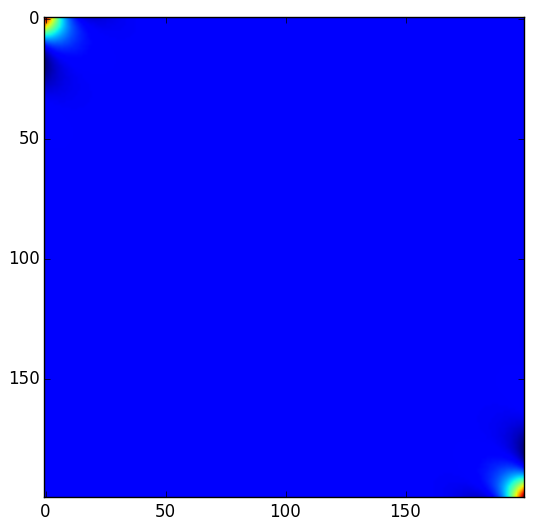

In [126]:
imshow(imag(Z));

/Users/usuario/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


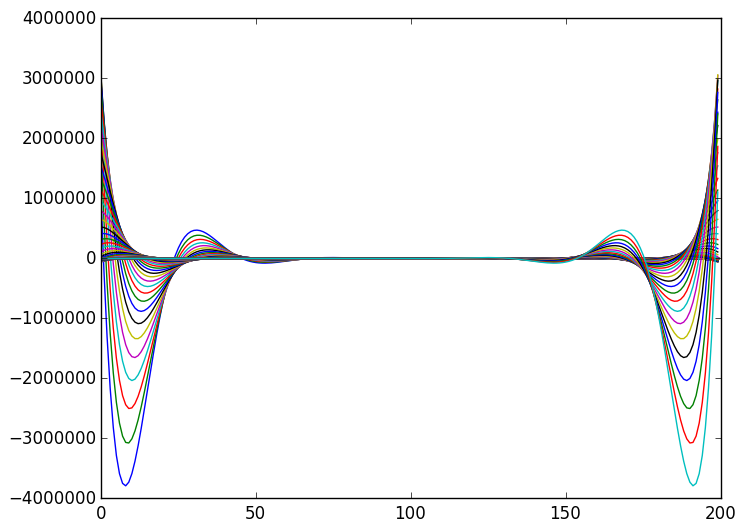

In [119]:
plot(Z);

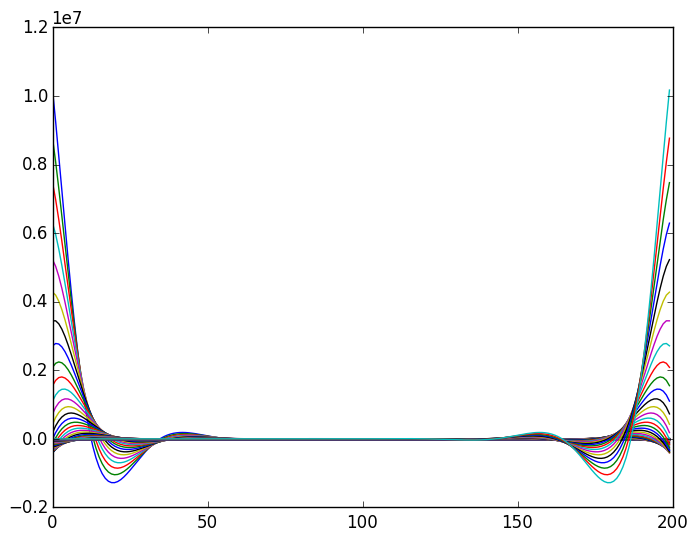

In [125]:
plot(imag(Z));

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{x_n}) = 2x_n \mod 1.
\end{equation}

- Obtengan los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{x_n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

In [20]:
"""dyn_sys(x) es la función que representa la operación x mod(1) pero ésta función solo 
esta definida en el dominio correspondiente al intervalo (0,1).Esta definida con la siguiente regla de correspondencia:

1) dyn_sys(x)=2x, si x ∈(0,0.5)
ó
2) dyn_sys(x)=2x-1, si x∈[0.5,1)

"""
function dyn_sys(x)
    if 0<=x<0.5
        ds=2*x
    elseif 0.50<=x<=1
        ds=2*x-1
    else
        println("Domain error ")
    end 
    return ds
end 

dyn_sys (generic function with 1 method)

In [21]:
incond=0.35  #condicion inicial
m=60 #numero de iteraciones
x=zeros(m)
x[1]=dyn_sys(incond)
for i in 1:m-1
    x[i+1]=dyn_sys(x[i])
end 


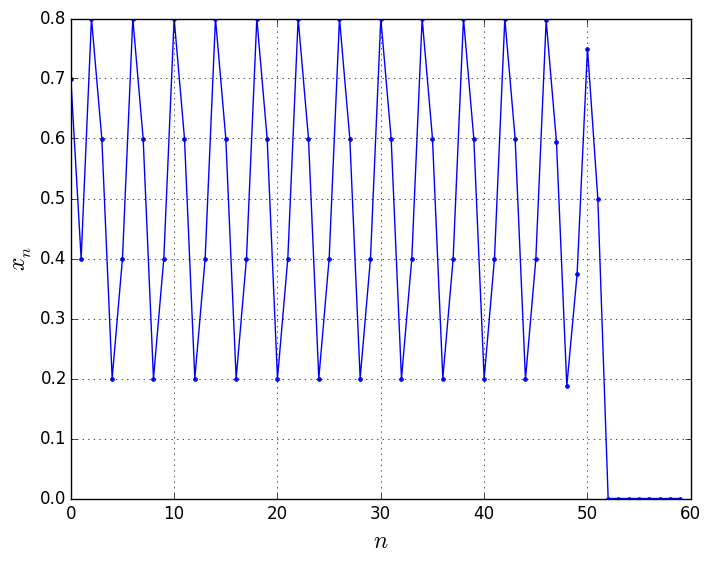

In [22]:
plot(x,"b.-");
ylabel(L"x_{n}",size=17)
xlabel(L"n",size=17)
grid("on");

In [42]:
n=10 #numero de condiciones iniciales
initial_cond=linspace(0,1,n)  #condiciones iniciales
m=60 #numero de iteraciones
x=zeros(m,n)
for j in 1:n
    x[1,j]=dyn_sys(initial_cond[j])
    for i in 1:m-1
        x[i+1,j]=dyn_sys(x[i,j])
    end 
end 


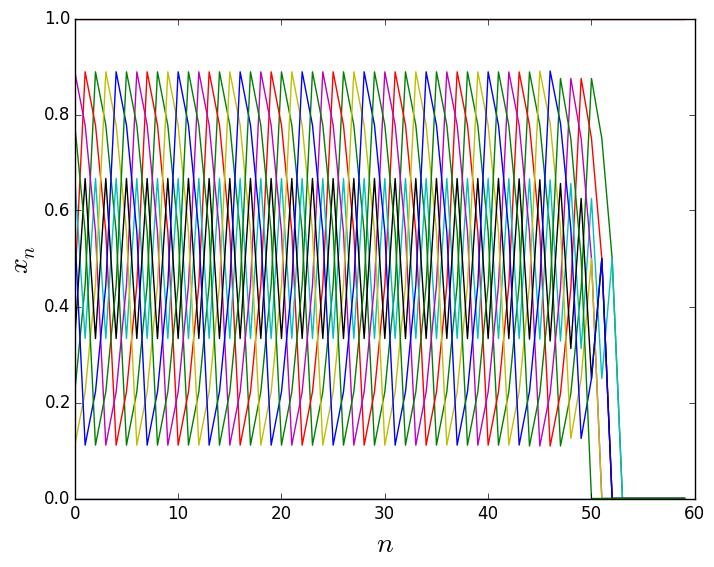

In [71]:
for i in 1:n
    plot(x[:,i])
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

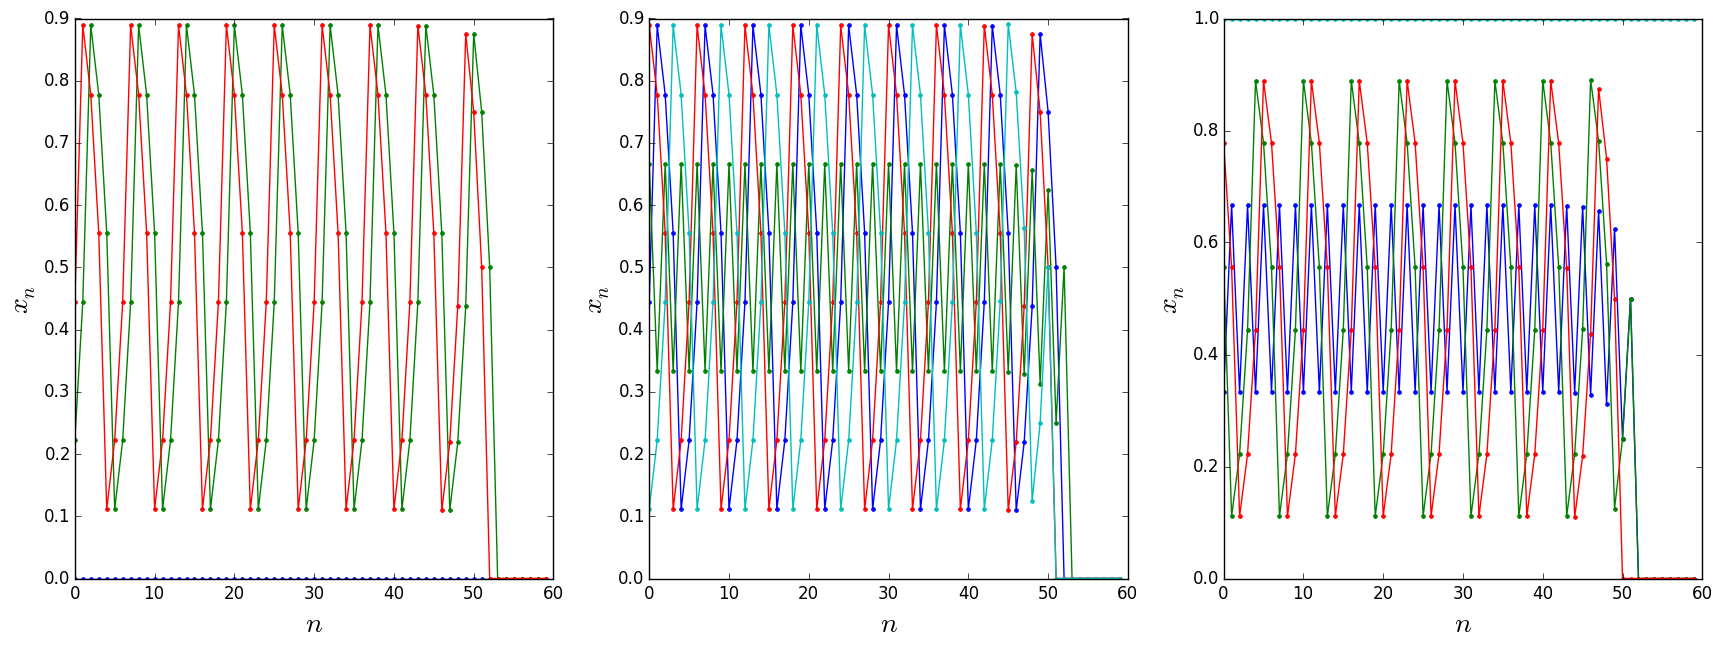

In [72]:
figure("pyplot_subplot_mixed",figsize=(21,7))
subplot(131)
for i in 1:3
    plot(x[:,i],".-")
end
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);


subplot(132)
for i in 3:6
    plot(x[:,i],".-")
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

subplot(133)
for i in 7:10
    plot(x[:,i],".-")
end 
ylabel(L"x_{n}",size=20)
xlabel(L"n",size=20);

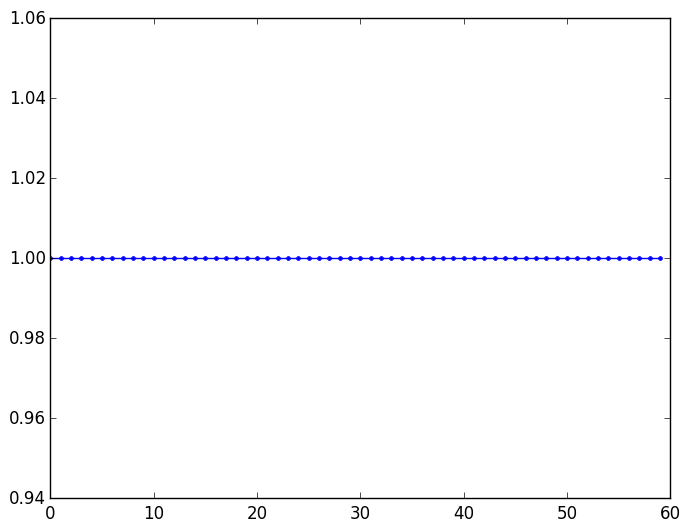

In [69]:
cont=10
plot(x[:,cont],".-");